In [26]:
import os

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
path = f"/home/{os.environ['USER']}/data/pusher_models/max_ep_100/max_ep_100_metrics.csv"

df = pd.read_csv(path, encoding='utf-8')

rewards = list(df["rewards"])
actor_loss = list(df["actor_loss"])
critic_loss = list(df["critic_loss"])


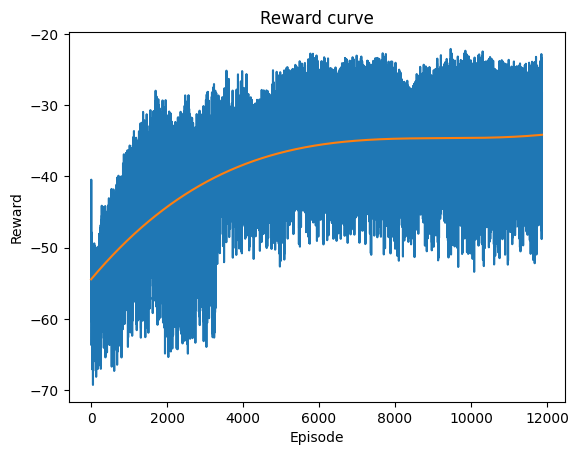

In [28]:
x = [i for i in range(len(rewards))]
y = rewards

fig, ax = plt.subplots()


ax.plot(x, y)

y_pol = np.array(y).reshape(-1,1)
x_pol = np.array(x).reshape(-1,1)

poly_features = PolynomialFeatures(degree=3)
x_pol = poly_features.fit_transform(x_pol)

model = LinearRegression()
model.fit(x_pol, y_pol)

y_pol_pred = model.predict(x_pol)

ax.plot(x, y_pol_pred)

ax.set_xlabel("Episode")
ax.set_ylabel("Reward")
ax.set_title("Reward curve")

plt.show()